In [ ]:
!nvidia-smi


Sun Feb 28 14:14:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf 

import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [ ]:
def get_data(path):
    labels=['nopain','moderate','severe']
    
    data = [] 
    for label in labels: 
        imm_path = os.path.join(path, label)
        print(imm_path)
        class_num = labels.index(label)
        print(class_num)
        for img in os.listdir(imm_path):
            print(img)
            try:
                img_arr = cv2.imread(os.path.join(imm_path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (224, 224)) # Reshaping images to preferred size
                
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

        

In [ ]:
train = get_data('../content/drive/MyDrive/data/train')
val = get_data('../content/drive/MyDrive/data/val')
test = get_data('../content/drive/MyDrive/data/test')

../content/drive/MyDrive/data/train/nopain
0
aa048t2aeaff128.png
aa048t2aeaff127.png
ll042t1aaaff021.png
ll042t1aaaff039.png
ak064t1aiunaff149.png
mg066t2aeunaff045.png
aa048t2aeunaff012.png
aa048t2aaunaff012.png
vw121t1aeaff058.png
ll042t1aaaff034.png
aa048t2aeaff123.png
mg066t2aeunaff032.png
jk103t1afunaff150.png
vw121t1aeaff051.png
bn080t1aeaff092.png
mg066t2aeunaff046.png
aa048t2aeaff116.png
aa048t2aeunaff006.png
vw121t1aeaff052.png
mg066t2aeunaff033.png
bn080t1aeaff093.png
nm106t1aaaff147.png
nm106t1aaaff138.png
bn080t1aeaff089.png
jk103t1afunaff148.png
bn080t1aeaff091.png
bg096t1aaaff022.png
ll042t1aaaff037.png
mg066t2aeunaff028.png
dr052t2aaaff217.png
th108t2afaff223.png
bn080t1aeaff087.png
ll042t1aaaff038.png
dr052t2aeaff003.png
aa048t2aeaff118.png
bg096t1aaaff010.png
aa048t2aeaff125.png
bn080t1aeaff081.png
bg096t1aaaff003.png
aa048t2aeunaff008.png
aa048t2aeaff114.png
mg066t2aeunaff048.png
dr052t2aaaff222.png
aa048t2aaunaff005.png
mg066t2aeunaff042.png
aa048t2aeaff115.png
ak064

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


../content/drive/MyDrive/data/val/nopain
0
th108t2afaff220.png
jk103t1afunaff154.png
bn080t1aeaff083.png
jk103t1afunaff142.png
nm106t1aaaff143.png
jk103t1afunaff155.png
ak064t1aiunaff142.png
aa048t2aeunaff003.png
bg096t1aaaff005.png
bn080t1aeaff095.png
bg096t1aaaff004.png
mg066t2aeunaff050.png
aa048t2aeaff120.png
bg096t1aaaff017.png
bn080t1aeaff082.png
dr052t2aaaff224.png
jk103t1afunaff143.png
mg066t2aeunaff034.png
th108t2afaff219.png
ll042t1aaaff042.png
vw121t1aeaff056.png
mg066t2aeunaff049.png
bg096t1aaaff016.png
dr052t2aaaff223.png
bn080t1aeaff094.png
aa048t2aaunaff007.png
aa048t2aaunaff019.png
aa048t2aeunaff004.png
nm106t1aaaff144.png
aa048t2aaunaff008.png
ll042t1aaaff041.png
vw121t1aeaff055.png
aa048t2aaunaff020.png
ak064t1aiunaff131.png
aa048t2aeunaff015.png
aa048t2aeaff121.png
mg066t2aeunaff035.png
ak064t1aiunaff143.png
../content/drive/MyDrive/data/val/moderate
1
jh043t2aeaff081.png
dn124t1aiaff289.png
bg096t1aeaff091.png
hs107t2aaaff183.png
bg096t1aeaff093.png
ak064t1aaaff281.

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


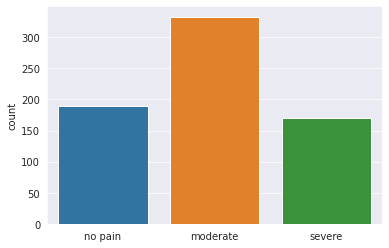

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("no pain")
    elif (i[1] == 1) :
        l.append("moderate")  
    else :
      l.append ("severe")     
sns.set_style('darkgrid')
sns.countplot(l)


In [ ]:
x_train=[]
y_train=[]
x_val=[]
y_val=[]
for feature , label in train :
  x_train.append(feature)
  y_train.append(label)
for feature , label in val : 
  x_val.append(feature)
  y_val.append(label)

x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, 224, 224, 1)
y_train = np.array(y_train)

x_val.reshape(-1, 224, 224, 1)
y_val = np.array(y_val)

In [ ]:
#data_augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
x_train.shape

(692, 224, 224, 3)

In [ ]:
model1=tf.keras.applications.InceptionResNetV2()
model = Sequential()
for i in model1.layers[:-1] :

  model.add(i) 
model.add(Dense(3, activation="softmax"))
model.summary()

225214464/225209952 [==============================] - 1s 0us/step


ValueError: ignored

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.000001), loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 100 , validation_data = (x_val, y_val))

Epoch 1/100
22/22 [==============================] - 1s 51ms/step - loss: 0.9930 - accuracy: 0.4827 - val_loss: 1.0412 - val_accuracy: 0.3711
Epoch 2/100
22/22 [==============================] - 1s 48ms/step - loss: 0.9800 - accuracy: 0.4870 - val_loss: 1.0308 - val_accuracy: 0.3711
Epoch 3/100
22/22 [==============================] - 1s 48ms/step - loss: 0.9698 - accuracy: 0.4942 - val_loss: 1.0242 - val_accuracy: 0.3711
Epoch 4/100
22/22 [==============================] - 1s 47ms/step - loss: 0.9553 - accuracy: 0.5116 - val_loss: 1.0128 - val_accuracy: 0.3711
Epoch 5/100
22/22 [==============================] - 1s 48ms/step - loss: 0.9502 - accuracy: 0.5246 - val_loss: 1.0026 - val_accuracy: 0.4330
Epoch 6/100
22/22 [==============================] - 1s 49ms/step - loss: 0.9323 - accuracy: 0.5231 - val_loss: 0.9887 - val_accuracy: 0.4742
Epoch 7/100
22/22 [==============================] - 1s 48ms/step - loss: 0.9239 - accuracy: 0.5650 - val_loss: 0.9753 - val_accuracy: 0.5567
Epoch 

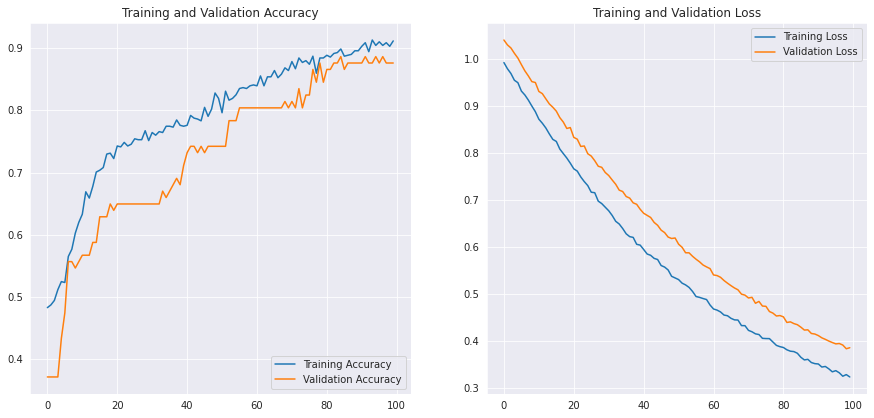

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['no pain (Class 0)','moderate (Class 1)','severe (Class 2)']))

                    precision    recall  f1-score   support

 no pain (Class 0)       1.00      0.89      0.94        38
moderate (Class 1)       0.82      0.92      0.87        36
  severe (Class 2)       0.78      0.78      0.78        23

          accuracy                           0.88        97
         macro avg       0.87      0.86      0.87        97
      weighted avg       0.88      0.88      0.88        97



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
x_test=[]
y_test=[]
for x,y in test:
    x_test.append(x)
    y_test.append(y)
for i in range((len(x_test))):
    x_test[i]=(x_test[i])/255
x_test=np.array(x_test)
x_test.reshape(-1, 224, 224, 1)
y_test = np.array(y_test)
print(model.evaluate(x_test, y_test))

4/4 [==============================] - 0s 40ms/step - loss: 0.6234 - accuracy: 0.7156
[0.6233913898468018, 0.7155963182449341]


In [ ]:
x= cv2.imread('/content/images.jfif')
x=x[...,::-1]
x=cv2.resize(x,(224,224))
y=cv2.imread('/content/lactose-intolerance-caucasian-man-holds-a-glass-of-milk-in-hand-and-suffers-from-severe-pain-in-stomach-on-a-blue-background-2BK88D2.jpg')
y=y[...,::-1]
y=cv2.resize(y,(224,224))

In [ ]:
x=np.array(x)/255
y=np.array(y)/255

In [ ]:
from keras.preprocessing import image
test_image = image.load_img('/content/lactose-intolerance-caucasian-man-holds-a-glass-of-milk-in-hand-and-suffers-from-severe-pain-in-stomach-on-a-blue-background-2BK88D2.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [ ]:
result

array([[0., 1., 0.]], dtype=float32)